# WeatherPy
----

#### Observations
1. Wind speeds tend to be the most extreme closer to the poles. 
2. As expected, the higest temperatures occur closer to the equator. 
3. While hard to tell from just looking at the graph, according to the linear regression model, the further north you are, the cloudier it should be. 

In [1]:
import sys
sys.path.append("..")

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# urls
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#data frame to hold waether info
weather_df = pd.DataFrame({
    'City': '',
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': '',
    'Date': []
})

# requests and data gathering
row = 0
for city in cities:
    try:
        q_url = f'{weather_url}q={city}&appid={weather_api_key}&units={units}'
        weather_json = requests.get(q_url).json()
        
        weather_df.loc[row,'City'] = city
        weather_df.loc[row,'Lat'] = round(weather_json['coord']['lat'],2)
        weather_df.loc[row,'Lng'] = round(weather_json['coord']['lon'],2)
        weather_df.loc[row,'Max Temp'] = weather_json['main']['temp_max']
        weather_df.loc[row,'Humidity'] = weather_json['main']['humidity']
        weather_df.loc[row,'Cloudiness'] = weather_json['clouds']['all']
        weather_df.loc[row,'Wind Speed'] = weather_json['wind']['speed']
        weather_df.loc[row,'Country'] = weather_json['sys']['country']
        weather_df.loc[row,'Date'] = weather_json['dt']
        
        print(f'Processing Record {row} | {city}')
        row+=1
    except:
        print(f'City:{city} not found. Skipping...')

Processing Record 0 | nikolskoye
Processing Record 1 | plettenberg bay
Processing Record 2 | sao filipe
Processing Record 3 | nanortalik
Processing Record 4 | tumaco
Processing Record 5 | jamestown
Processing Record 6 | bluff
Processing Record 7 | tasiilaq
Processing Record 8 | hobart
Processing Record 9 | qaanaaq
Processing Record 10 | port elizabeth
Processing Record 11 | cabo san lucas
Processing Record 12 | talkha
Processing Record 13 | nhulunbuy
Processing Record 14 | rikitea
Processing Record 15 | mehamn
Processing Record 16 | nuuk
City:grand river south east not found. Skipping...
Processing Record 17 | chokurdakh
Processing Record 18 | linjiang
Processing Record 19 | punta arenas
Processing Record 20 | muros
Processing Record 21 | auki
Processing Record 22 | hermanus
Processing Record 23 | sokoni
Processing Record 24 | upernavik
Processing Record 25 | iqaluit
Processing Record 26 | guangyuan
Processing Record 27 | marzuq
Processing Record 28 | monterey
Processing Record 29 | bu

Processing Record 226 | hobyo
Processing Record 227 | tazovskiy
Processing Record 228 | quatre cocos
Processing Record 229 | omsukchan
Processing Record 230 | constitucion
Processing Record 231 | kenai
Processing Record 232 | cayenne
Processing Record 233 | mahebourg
Processing Record 234 | sept-iles
Processing Record 235 | maniitsoq
Processing Record 236 | thompson
Processing Record 237 | sabang
Processing Record 238 | sunnyside
Processing Record 239 | faanui
Processing Record 240 | moissala
Processing Record 241 | touros
Processing Record 242 | hays
City:tumannyy not found. Skipping...
Processing Record 243 | san antonio
Processing Record 244 | thai binh
City:kegayli not found. Skipping...
Processing Record 245 | ankang
Processing Record 246 | teguldet
Processing Record 247 | kodiak
Processing Record 248 | sabya
Processing Record 249 | shahr-e babak
Processing Record 250 | burns lake
City:tsihombe not found. Skipping...
City:umm jarr not found. Skipping...
Processing Record 251 | sou

Processing Record 455 | ilulissat
City:palabuhanratu not found. Skipping...
Processing Record 456 | griffith
Processing Record 457 | teguise
Processing Record 458 | chicholi
Processing Record 459 | rorvik
Processing Record 460 | homer
Processing Record 461 | piracuruca
Processing Record 462 | presidencia roque saenz pena
Processing Record 463 | bokoro
City:mullaitivu not found. Skipping...
Processing Record 464 | half moon bay
City:zanatepec not found. Skipping...
Processing Record 465 | kuloy
Processing Record 466 | petropavlovsk-kamchatskiy
Processing Record 467 | barranca
Processing Record 468 | flinders
Processing Record 469 | san buenaventura
Processing Record 470 | namioka
Processing Record 471 | kungurtug
Processing Record 472 | qandala
Processing Record 473 | greenock
Processing Record 474 | rawson
Processing Record 475 | nova olimpia
Processing Record 476 | tolaga bay
Processing Record 477 | west bay
Processing Record 478 | peniche
Processing Record 479 | pangai
City:vestbygda

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
output_path = 'output_data/weather_data.csv'
weather_df.to_csv(output_path)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.70,30.79,33.80,86.0,75.0,4.47,RU,1.615915e+09
1,plettenberg bay,-34.05,23.37,65.44,78.0,76.0,11.65,ZA,1.615915e+09
2,sao filipe,14.90,-24.50,72.66,73.0,0.0,13.85,CV,1.615915e+09
3,nanortalik,60.14,-45.24,26.92,95.0,100.0,19.01,GL,1.615915e+09
4,tumaco,1.80,-78.82,80.65,82.0,95.0,5.91,CO,1.615915e+09


In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.034640,15.657945,55.925908,69.585616,55.339041,8.214658,1.615915e+09
std,33.598166,90.438788,29.075324,22.149257,37.037065,5.769490,9.034753e+01
min,-54.800000,-179.170000,-41.960000,1.000000,0.000000,0.130000,1.615915e+09
25%,-9.327500,-64.757500,36.000000,58.000000,20.000000,3.940000,1.615915e+09
50%,21.450000,22.035000,66.200000,75.000000,69.500000,6.910000,1.615915e+09
75%,47.617500,89.210000,78.810000,86.000000,90.000000,11.037500,1.615915e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,39.120000,1.615915e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
    

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

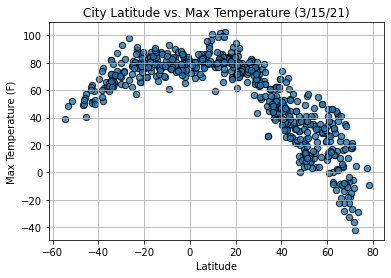

In [6]:
title = 'City Latitude vs. Max Temperature (3/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(6,4), title=title, alpha=0.80,edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Max Temperature (F)')
fig = scatter.get_figure()
fig.savefig('output_data/temp_v_lat.png')


The above graph looks at the max temperature compared to the city's latitude.
You can see that cities closer to the equator (0 latitude), have much higher max temperatures

## Latitude vs. Humidity Plot

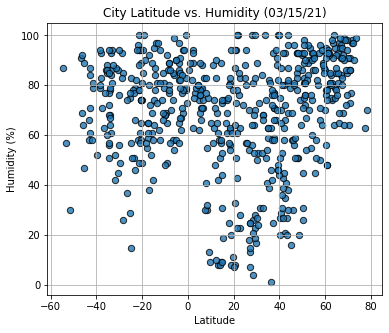

In [7]:
title = 'City Latitude vs. Humidity (03/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Humidity', title=title, grid=True, figsize=(6,5), alpha=0.80,edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Humidity (%)')
scatter.get_figure().savefig('output_data/humid_v_lat.png')

The above plot is showing the relationship between latitude of a city and its humidity. 
The average humidity value seems to be reletivley consistant, with a lot more outliers occuring 
at 20 to 40 degrees. Which coincidentally, is the same lattitude as the Sahara Desert.

## Latitude vs. Cloudiness Plot

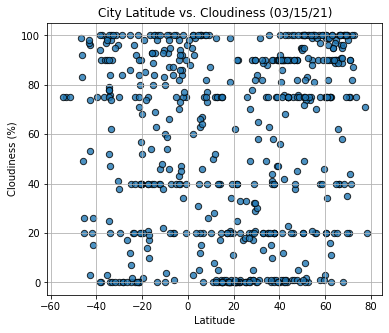

In [8]:
title = 'City Latitude vs. Cloudiness (03/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', title=title, grid=True, figsize=(6,5), alpha=0.80, edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Cloudiness (%)')

scatter.get_figure().savefig('output_data/cloud_v_lat.png')

Shown in the plot above is the relationship between latitude of a city and the percentage of cloudiness. This seems to be all over the board and no clear correlation can be made. 

## Latitude vs. Wind Speed Plot

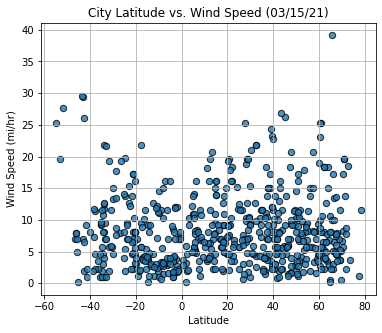

In [9]:
title = 'City Latitude vs. Wind Speed (03/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', title=title, grid=True, figsize=(6,5), alpha=0.80, edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Wind Speed (mi/hr)')

scatter.get_figure().savefig('output_data/wind_v_lat.png')

In the figure above, showing latitude versus wind speeds, there seems to be no real pattern. Ignoring the extreme values below -40 degrees, most of the data lies within a reasonably small bound (0-10km/hr). Id say that this shows, at least for the day the data was gathered, winds were consistant. 

## Linear Regression

In [10]:
north = weather_df.loc[weather_df['Lat'] >=0]
south = weather_df.loc[weather_df['Lat'] < 0]

def plotLinRegress(x, y, xlabel, ylabel, labelpos, image_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is: {rvalue**2}')
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, labelpos, fontsize=15, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f'output_data/{image_name}.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7847129216845555


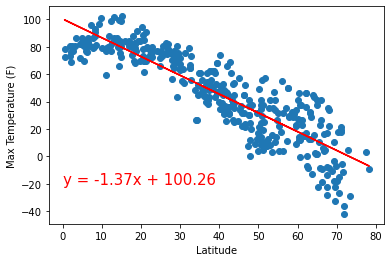

In [11]:
xlabel = 'Latitude'
ylabel = 'Max Temperature (F)'
labelpos = (0,-20)
plotLinRegress(north['Lat'], north['Max Temp'], xlabel, ylabel, labelpos, 'north_temps_v_lat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4521899201295144


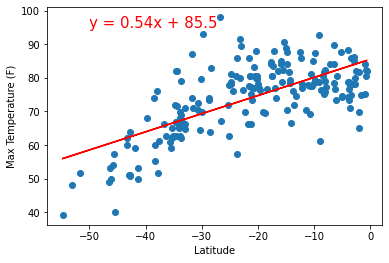

In [27]:
xlabel = 'Latitude'
ylabel = 'Max Temperature (F)'
labelpos = (-50, 95)
plotLinRegress(south['Lat'], south['Max Temp'], xlabel, ylabel, labelpos, 'south_temps_v_lat')

The two above plots show oppisite trends, which is expected. The further away from 0 you get, the lower you can expect the temperatures to be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11206805060850125


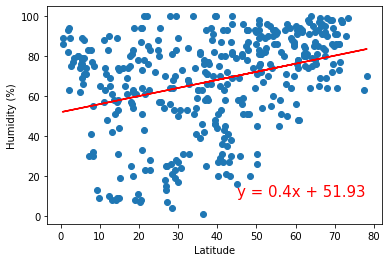

In [13]:
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
labelpos = (45,10)
plotLinRegress(north['Lat'], north['Humidity'], xlabel, ylabel, labelpos, 'north_humid_v_lat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015671242429345936


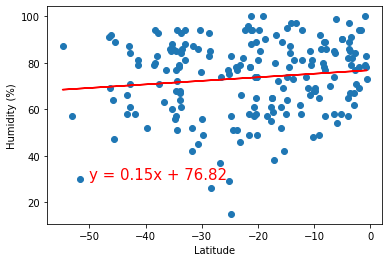

In [14]:
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
labelpos = (-50, 30)
plotLinRegress(south['Lat'], south['Humidity'], xlabel, ylabel, labelpos, 'south_humid_v_lat')

The two above graphs show a small correlation between latitude and humidity of a city. THe further north you are in your hemisphere, the higher the average humidity should be. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11114784433134041


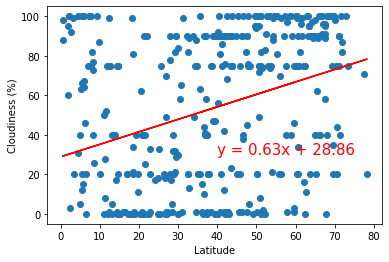

In [25]:
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
labelpos = (40,30)
plotLinRegress(north['Lat'], north['Cloudiness'], xlabel, ylabel, labelpos, 'north_clouds_v_lat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0017383367680242207


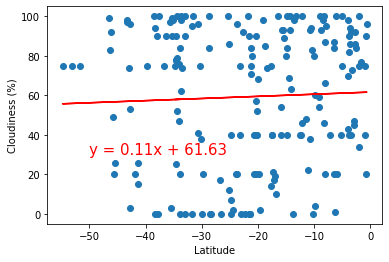

In [22]:
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
labelpos = (-50,30)
plotLinRegress(south['Lat'], south['Cloudiness'], xlabel, ylabel, labelpos, 'south_clouds_v_lat')

One observation we can take away from the above two graphs is how cloudiness seems to collect around the extreme values. Both hemispheres show lots of numbers at the 0 and 100 mark respectivley, with large gaps in the middle.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0007332851203377666


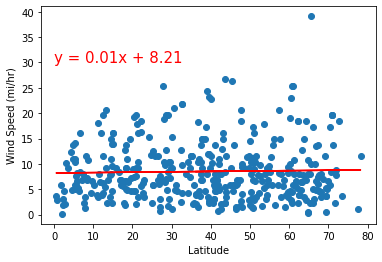

In [21]:
xlabel = 'Latitude'
ylabel = 'Wind Speed (mi/hr)'
labelpos = (0,30)
plotLinRegress(north['Lat'], north['Wind Speed'], xlabel, ylabel, labelpos, 'north_wind_v_lat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08705389848869292


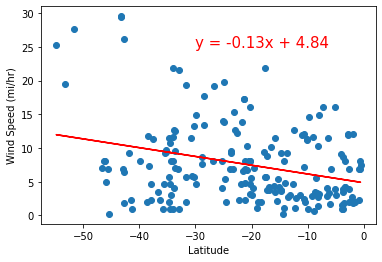

In [20]:
xlabel = 'Latitude'
ylabel = 'Wind Speed (mi/hr)'
labelpos = (-30,25)
plotLinRegress(south['Lat'], south['Wind Speed'], xlabel, ylabel, labelpos, 'south_wind_v_lat')

In the two plots above that compare windiness with latitude, you can see that at the poles are where the highest wind conditions are. In both graphs, the values are noticibly lower around the equator.